In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # To handle with matrices
import scipy


In [2]:
df_wine1 = pd.read_csv('/Users/samuelbohn/Library/Mobile Documents/com~apple~CloudDocs/WineNot_Techlabs/TechLabsDUS_WineNot/data/raw/winemag-data-130k-v2.csv', index_col=0)
df_wine1

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


At first we need an overview over all given countries in the dataset:

/var/folders/d0/ypf_6_yx65s8wv8rbpl0q1zh0000gn/T/ipykernel_30433/3247401971.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


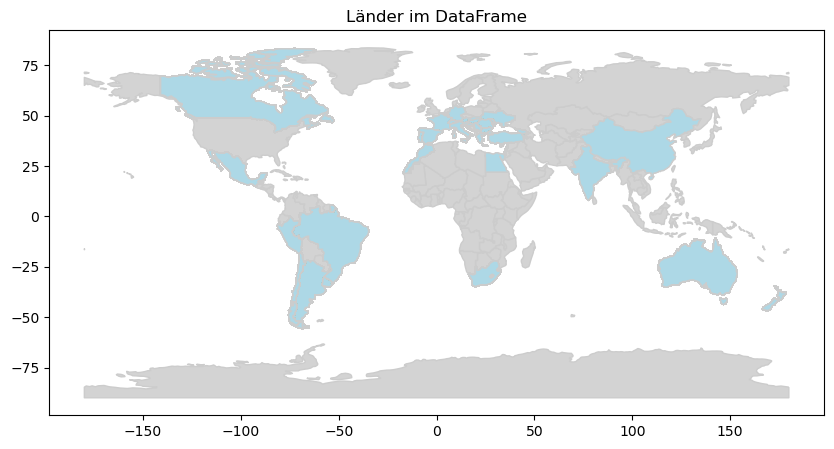

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_merged = world.merge(df_wine1, how='left', left_on='name', right_on='country')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world_merged.plot(ax=ax, color='lightgrey', edgecolor='0.8')
world_merged[world_merged['country'].notnull()].plot(ax=ax, color='lightblue', edgecolor='0.8')
ax.set_title('Länder im DataFrame')

plt.show()

Unfortunately some countries doesnt appear in the map, for example USA.

In [4]:
unrecognized_countries = df_wine1[~df_wine1['country'].isin(world_merged['country'])]['country'].tolist()

L = [] 
for x in unrecognized_countries:
    if x in L:
        pass
    else:
        L.append(x)
print(L)

['US', 'Czech Republic', 'England', 'Bosnia and Herzegovina', 'Macedonia']


The name of those countries has to be changed in the official Countryname

In [5]:
replacements = {
    'US': 'United States of America',
    'Czech Republic': 'Czechia',
    'England': 'United Kingdom',
    'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'Macedonia': 'North Macedonia'
}
df_wine1['country'] = df_wine1['country'].replace(replacements)

# Ausgabe des aktualisierten DataFrames
df_wine1

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,United States of America,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,United States of America,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,United States of America,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,United States of America,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


/var/folders/d0/ypf_6_yx65s8wv8rbpl0q1zh0000gn/T/ipykernel_30433/3247401971.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


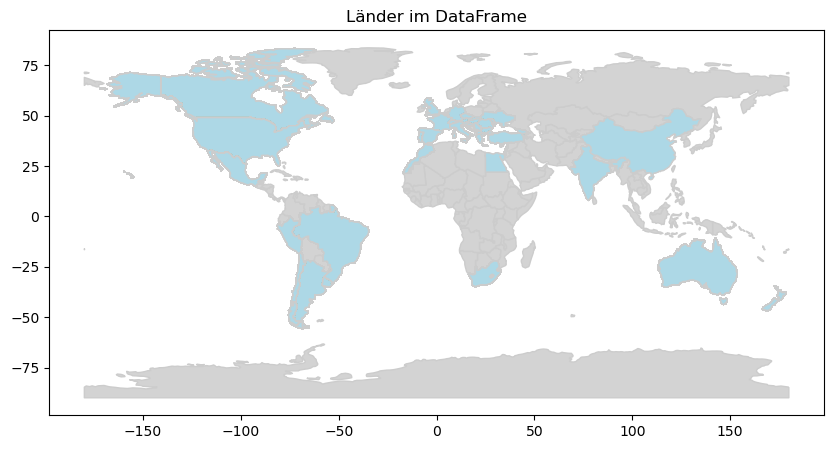

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_merged = world.merge(df_wine1, how='left', left_on='name', right_on='country')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world_merged.plot(ax=ax, color='lightgrey', edgecolor='0.8')
world_merged[world_merged['country'].notnull()].plot(ax=ax, color='lightblue', edgecolor='0.8')
ax.set_title('Länder im DataFrame')

plt.show()

/var/folders/d0/ypf_6_yx65s8wv8rbpl0q1zh0000gn/T/ipykernel_30433/2785166968.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


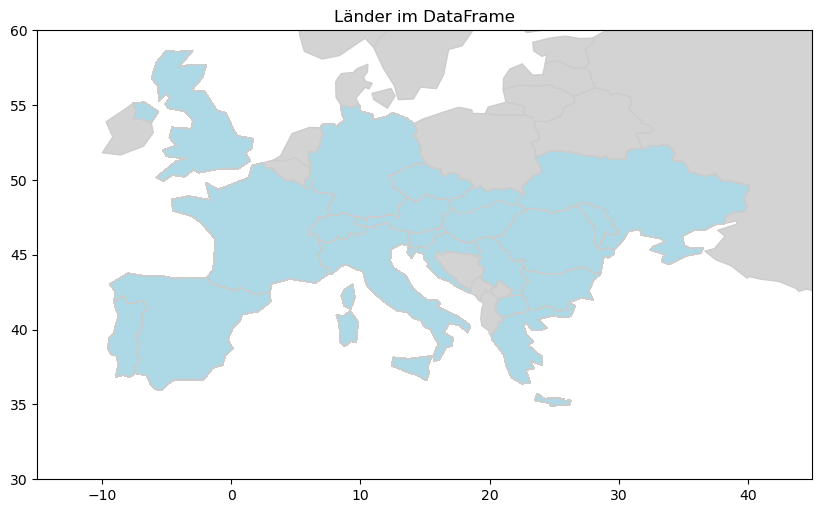

In [38]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']
world_merged = europe.merge(df_wine1, how='left', left_on='name', right_on='country')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world_merged.plot(ax=ax, color='lightgrey', edgecolor='0.8')
world_merged[world_merged['country'].notnull()].plot(ax=ax, color='lightblue', edgecolor='0.8')
ax.set_title('Länder im DataFrame')



lat_min, lat_max = 30, 60
lon_min, lon_max = -15, 45

# Set the limits for the x-axis (longitude) and y-axis (latitude)
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

plt.show()

In [ ]:

europe = world[world['continent'] == 'Europe']

# Füge eine Spalte mit Hangwerten hinzu
merged = europe.set_index('name').join(pd.DataFrame(Slope.items(), columns=['name', 'value']).set_index('name'))


In [7]:
df_wine1.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [8]:
filt = df_wine1["country"] == "United States of America"
df_wine1[filt]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,United States of America,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,United States of America,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,United States of America,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,United States of America,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,United States of America,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129945,United States of America,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,United States of America,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs
129950,United States of America,This opens with herbaceous dollops of thyme an...,Blocks 7 & 22,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry
129952,United States of America,This Zinfandel from the eastern section of Nap...,NaN,90,22.0,California,Chiles Valley,Napa,Virginie Boone,@vboone,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,Houdini


In [9]:
df_wine1['price_log'] = np.log(df_wine1['price'])

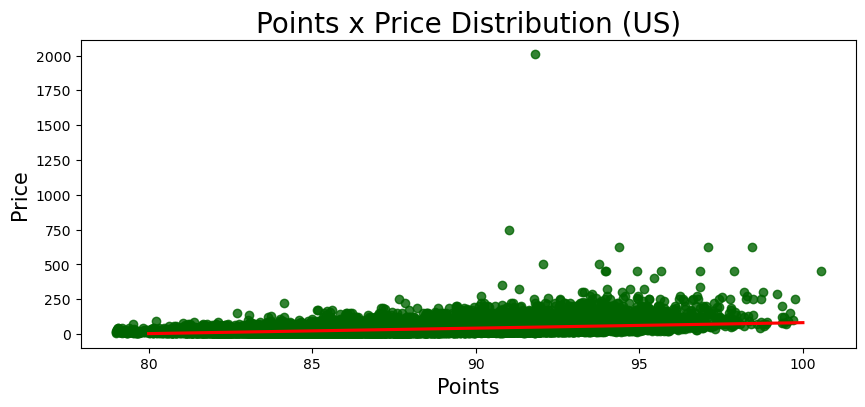

Slope of US: 1.0 3.9377851256089182


In [10]:
filt_US = df_wine1["country"] == "United States of America"

plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price', 
                data=df_wine1[filt_US], line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribution (US)", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

slope, intercept, r, p, sterr = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
print("Slope of US:", r, slope)

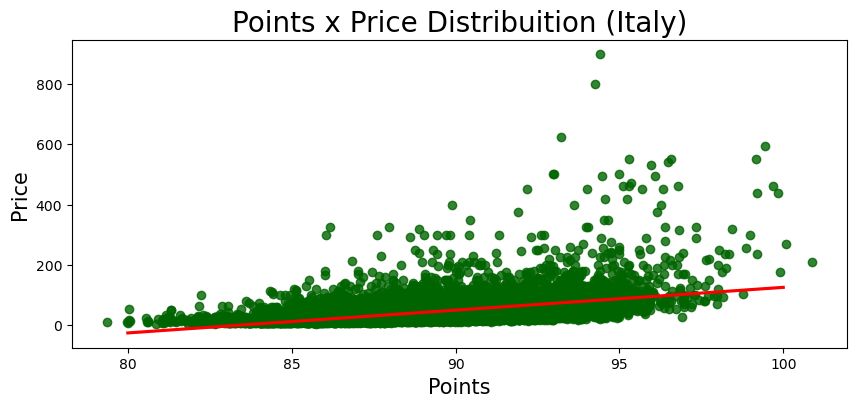

Slope of Italy: 1.0 7.552085911281582


In [11]:
filt_it = df_wine1["country"] == "Italy"

plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price', 
                data=df_wine1[filt_it], line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition (Italy)", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

slope, intercept, r, p, sterr = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
print("Slope of Italy:", r, slope)

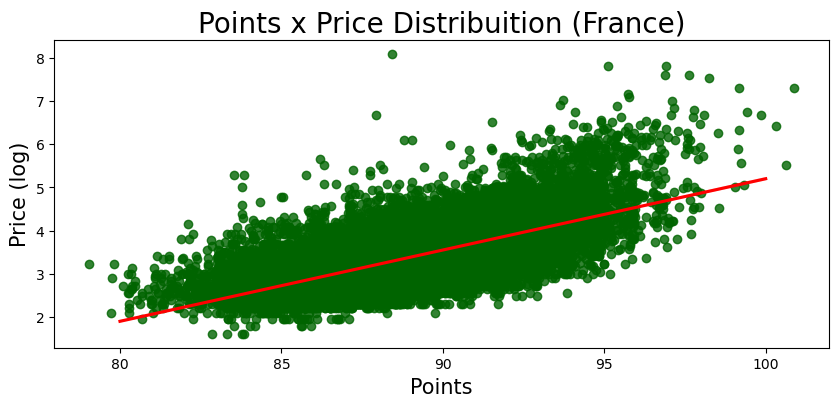

Slope of France: 0.16527912655268875


In [12]:
filt_fr = df_wine1["country"] == "France"

plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df_wine1[filt_fr], line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition (France)", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

slope, intercept, r, p, sterr = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
print("Slope of France:", slope)

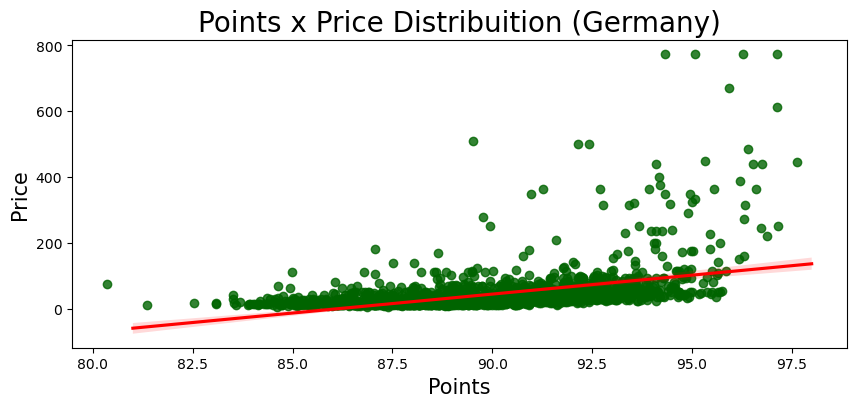

Slope of Germany: 11.515506613985087


In [13]:
filt_Ge = df_wine1["country"] == "Germany"

plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price', 
                data=df_wine1[filt_Ge], line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition (Germany)", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

slope, intercept, r, p, sterr = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
print("Slope of Germany:", slope)

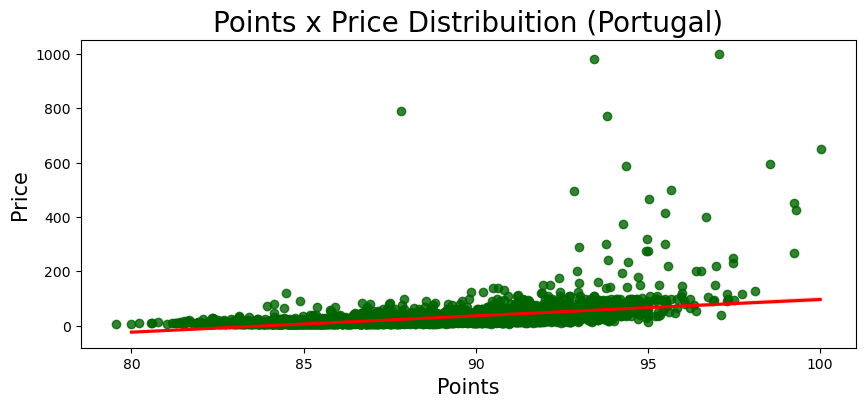

Slope of Portugal: 6.008455338817511


In [14]:
filt_Po = df_wine1["country"] == "Portugal"

plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price', 
                data=df_wine1[filt_Po], line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition (Portugal)", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

slope, intercept, r, p, sterr = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
print("Slope of Portugal:", slope)

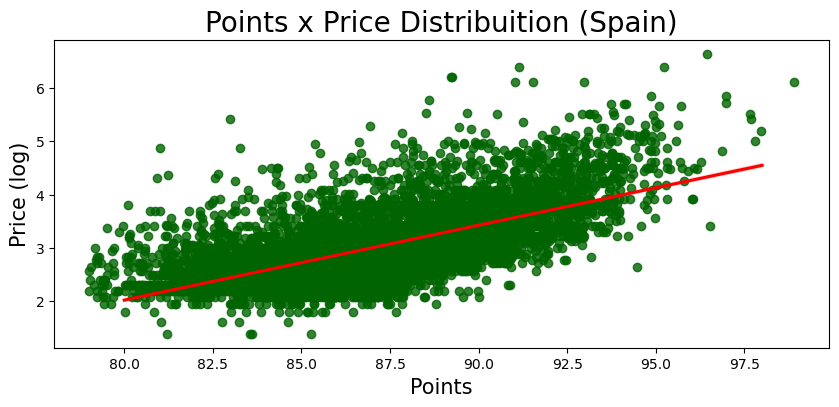

Slope of Spain: 0.14067438083963585


In [15]:
filt_Sp = df_wine1["country"] == "Spain"

plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df_wine1[filt_Sp], line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition (Spain)", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

slope, intercept, r, p, sterr = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
print("Slope of Spain:", slope)

In [16]:
Countrys = []

for land in df_wine1['country'].unique():
    Countrys.append(land)
#es sind nan werte in der liste, also müssen diese entfernt werden:
cleanlist = []
for count in Countrys:
    if type(count) == type("x"):
        cleanlist.append(count)
    else:
        print("Wine without origin country")
print(Countrys)
print(cleanlist)
x = 0
for C in Countrys:
    x += 1
print(x)


Wine without origin country
['Italy', 'Portugal', 'United States of America', 'Spain', 'France', 'Germany', 'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa', 'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico', 'Canada', nan, 'Turkey', 'Czechia', 'Slovenia', 'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'United Kingdom', 'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'North Macedonia', 'China', 'Egypt']
['Italy', 'Portugal', 'United States of America', 'Spain', 'France', 'Germany', 'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa', 'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico', 'Canada', 'Turkey', 'Czechia', 'Slovenia', 'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'United Kingdom', 'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and

['Italy', 'Portugal', 'United States of America', 'Spain', 'France', 'Germany', 'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa', 'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico', 'Canada', 'Turkey', 'Czechia', 'Slovenia', 'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'United Kingdom', 'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'North Macedonia', 'China', 'Egypt']
Slope of: Italy 1.0 7.552085911281582


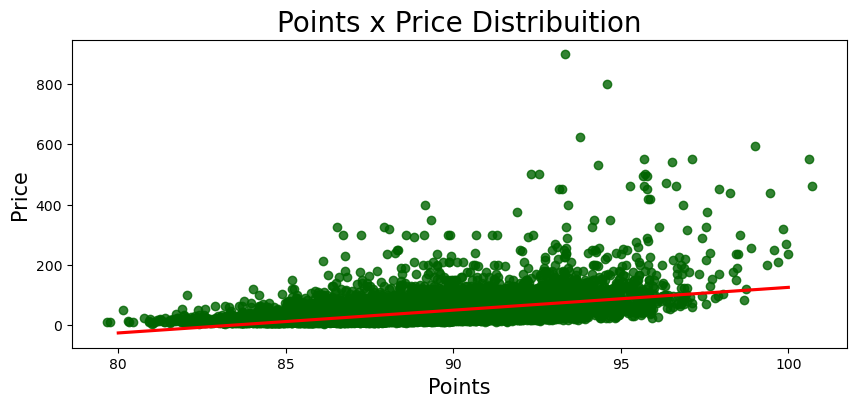

Slope of: Portugal 1.0 6.008455338817511


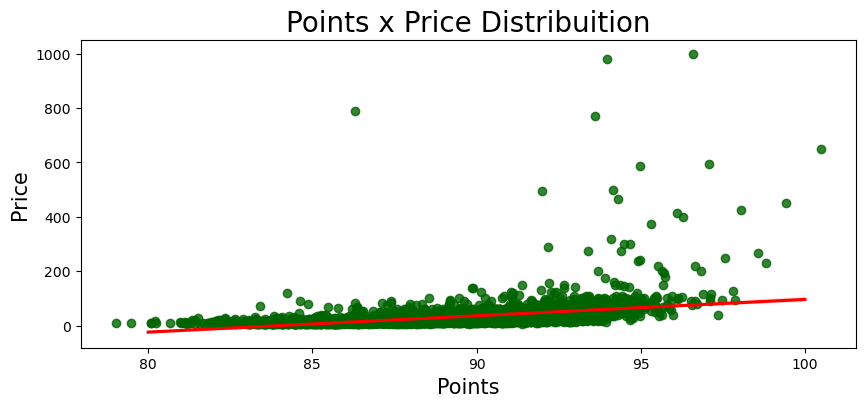

Slope of: United States of America 1.0 3.9377851256089182


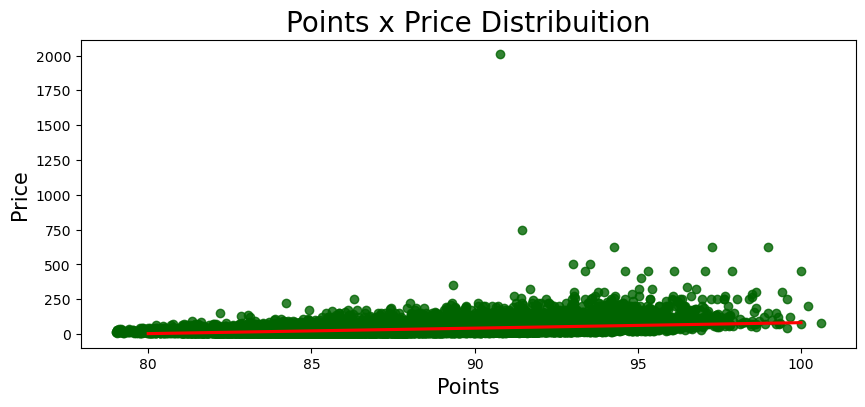

Slope of: Spain 0.9999999999999997 5.3175928587393635


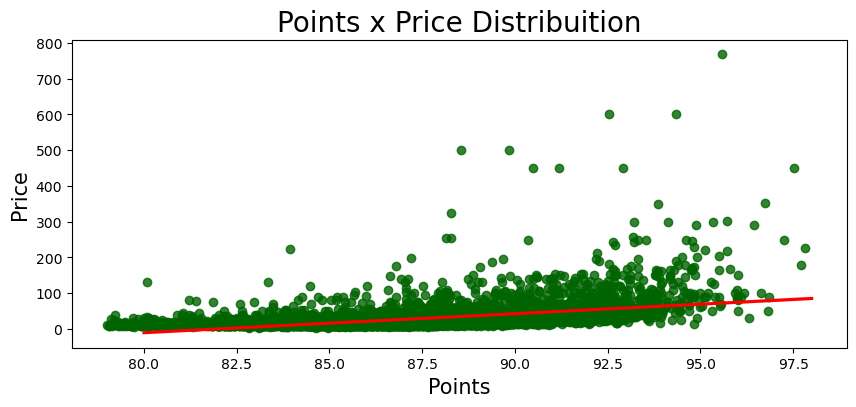

Slope of: France 0.9999999999999997 9.93630064143265


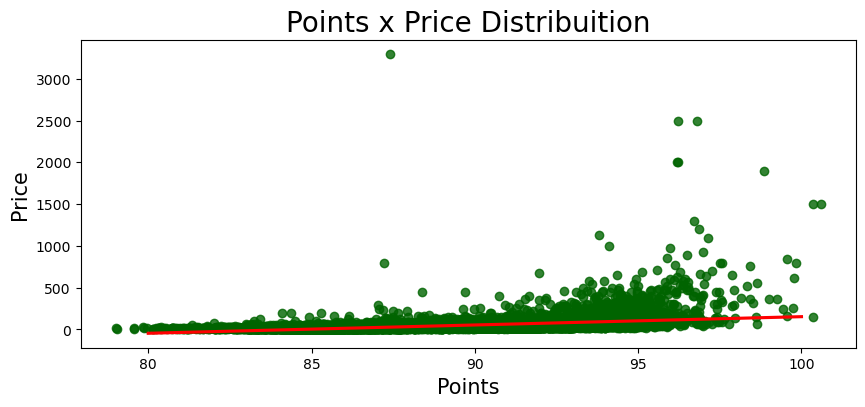

Slope of: Germany 1.0 11.515506613985087


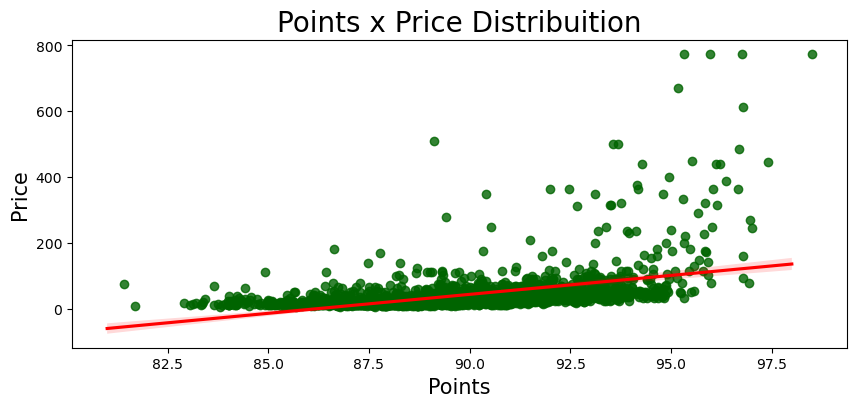

Slope of: Argentina 0.9999999999999999 4.181243723246053


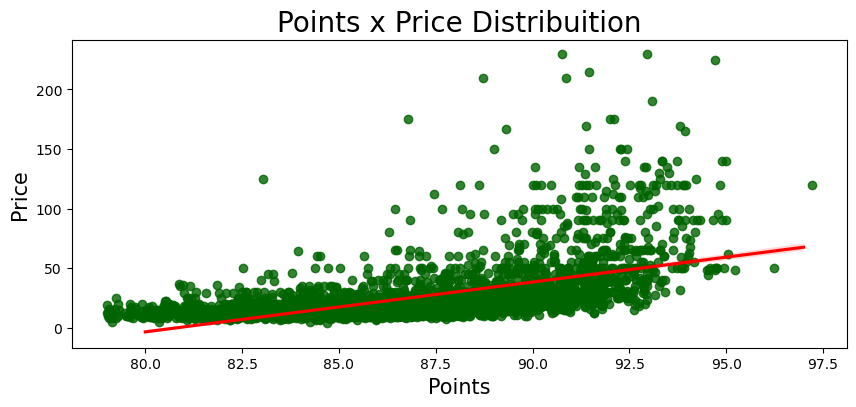

Slope of: Chile 1.0 3.900409444173919


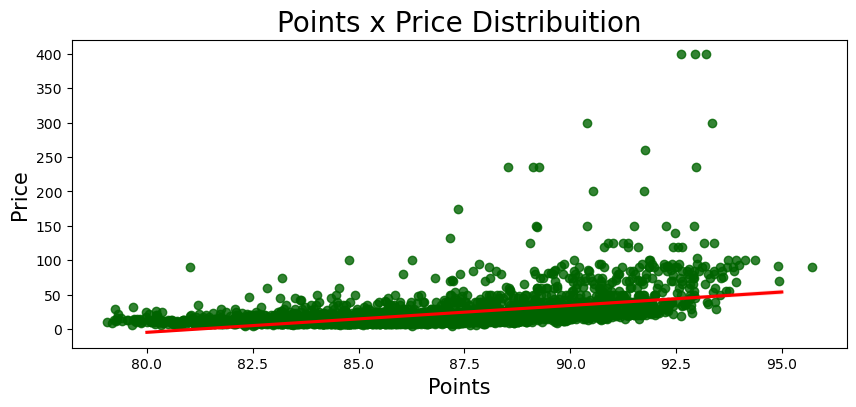

Slope of: Australia 1.0 7.630469501226528


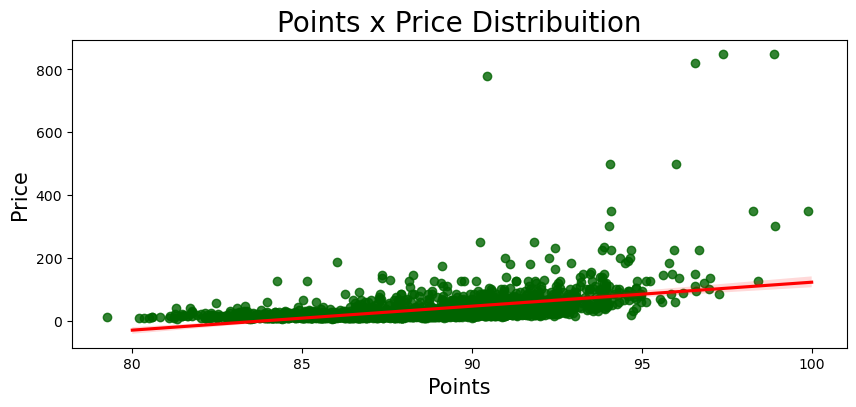

Slope of: Austria 1.0 4.343500873099224


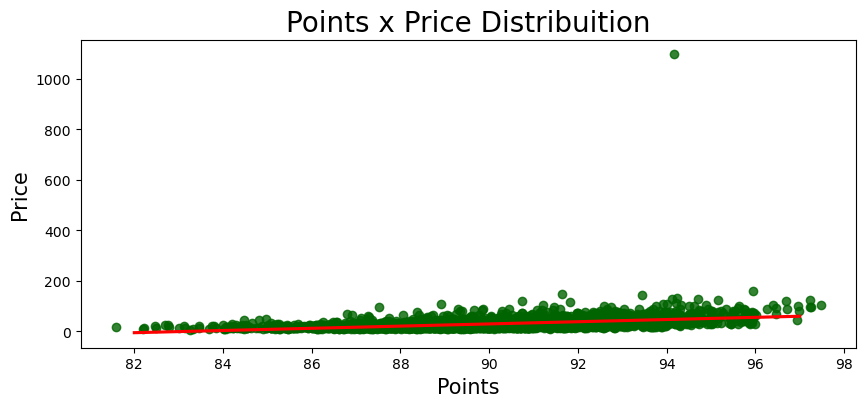

Slope of: South Africa 0.9999999999999998 5.273047187341252


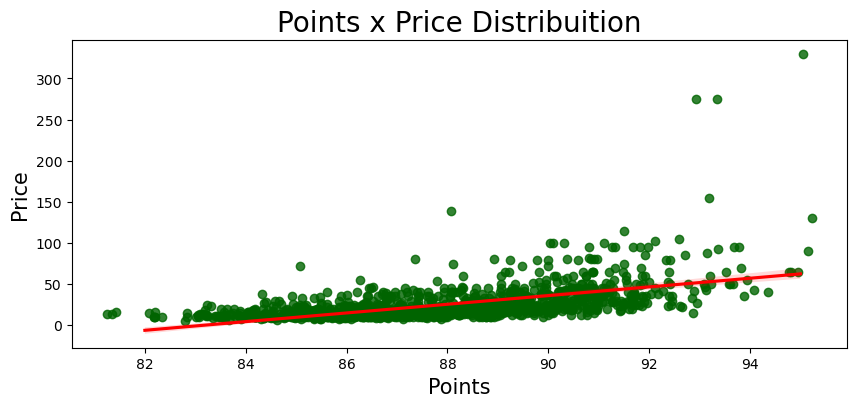

Slope of: New Zealand 0.9999999999999996 3.3981703177595075


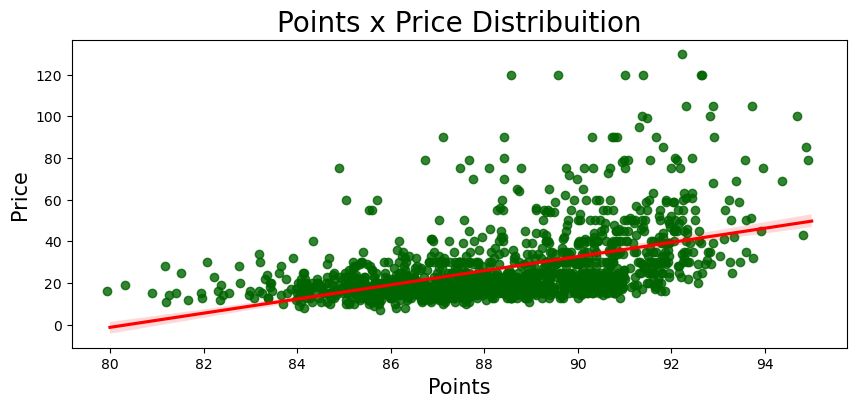

Slope of: Israel 1.0 2.6346818513149426


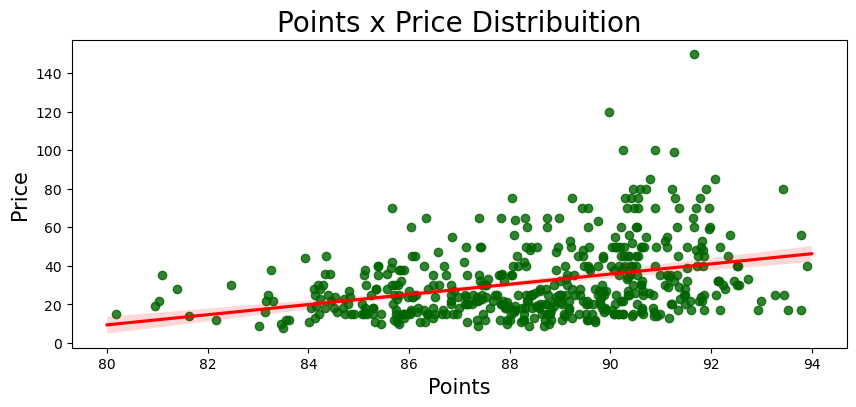

Slope of: Hungary 0.9999999999999996 8.930421533773497


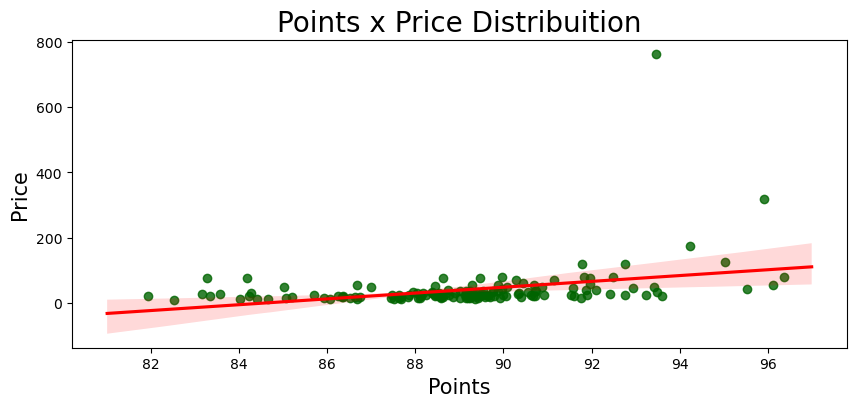

Slope of: Greece 1.0 0.742795743621217


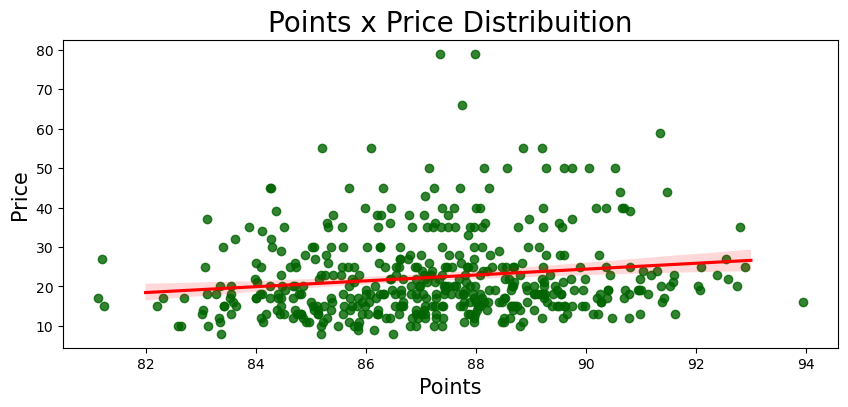

Slope of: Romania 1.0 1.7799315849486814


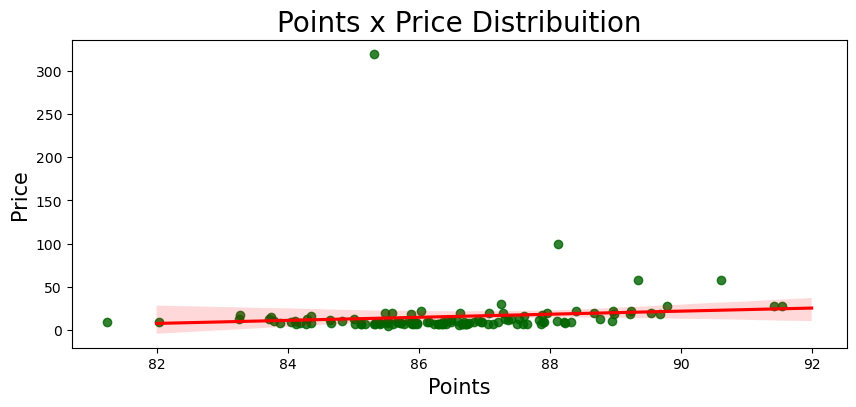

Slope of: Mexico 1.0 3.0757626550452546


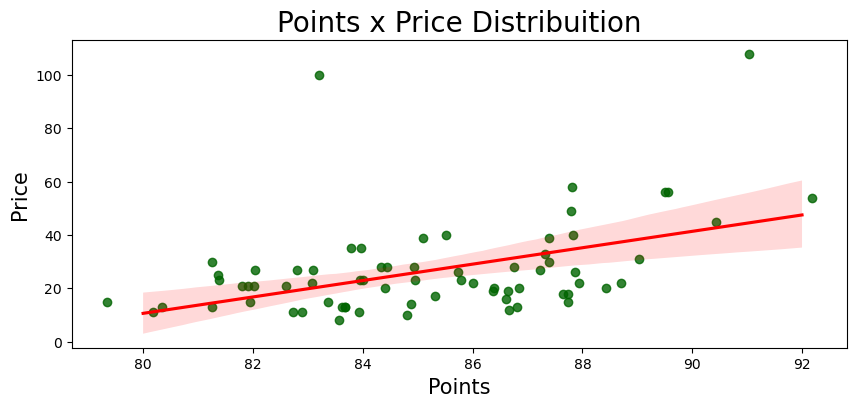

Slope of: Canada 0.9999999999999993 2.613864661980376


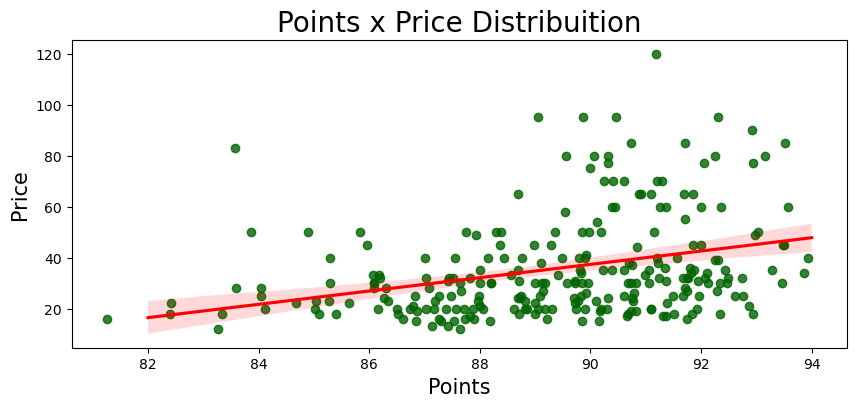

Slope of: Turkey 1.0 1.6612490401842834


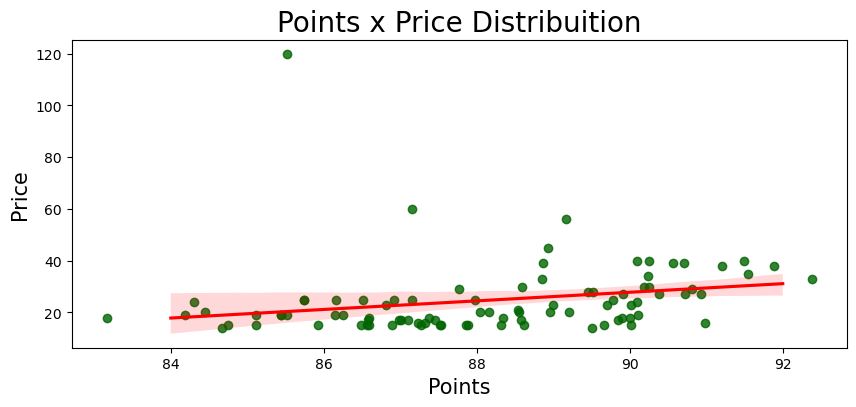

Slope of: Czechia 0.9999999999999998 3.8837209302325912


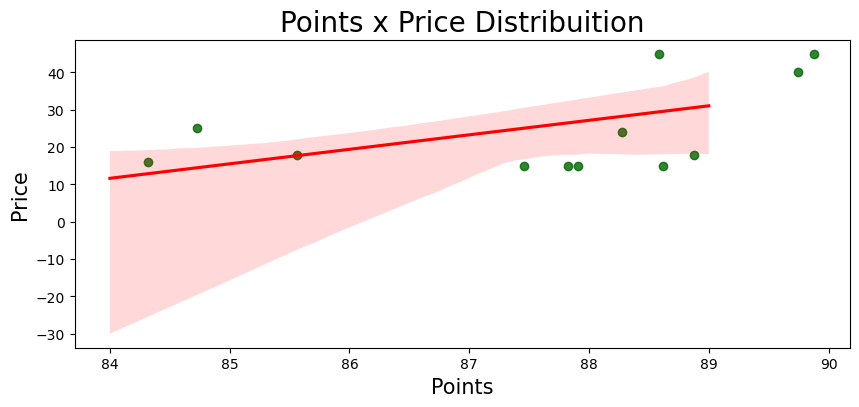

Slope of: Slovenia 1.0 3.578614472832327


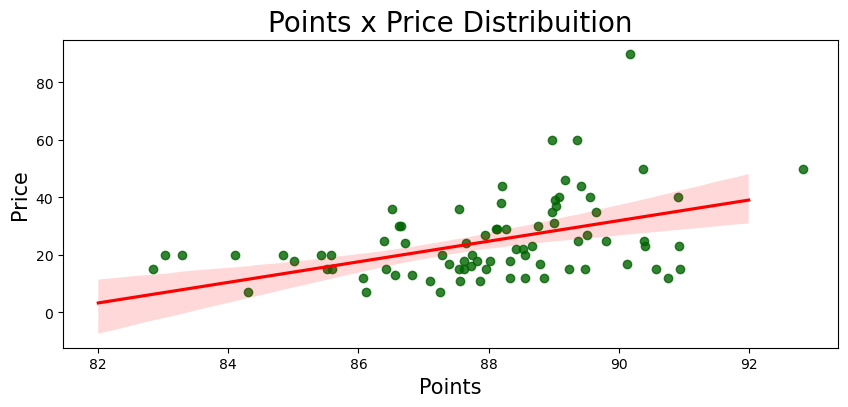

Slope of: Luxembourg -0.9999999999999997 -2.2000000000000837


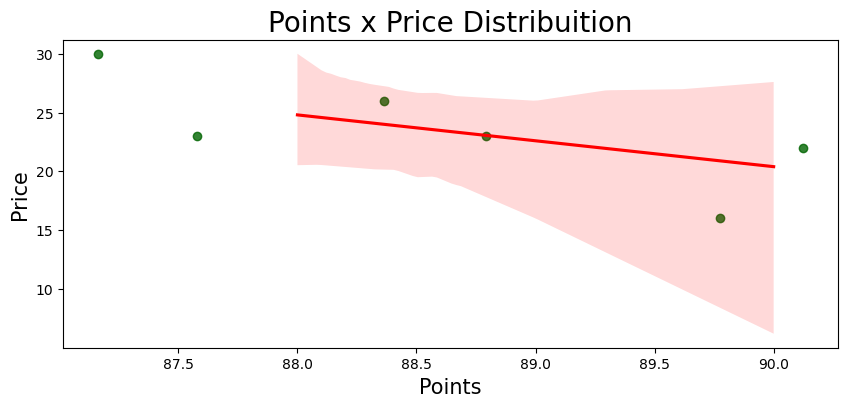

Slope of: Croatia 1.0 2.0280774233034875


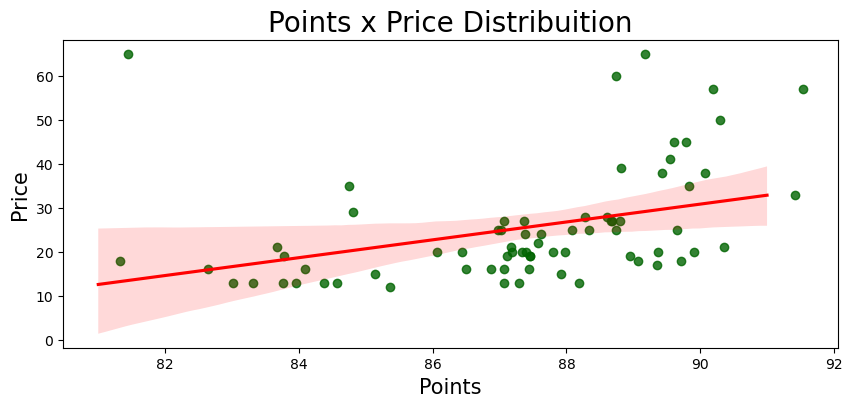

Slope of: Georgia 1.0 0.14030834868611955


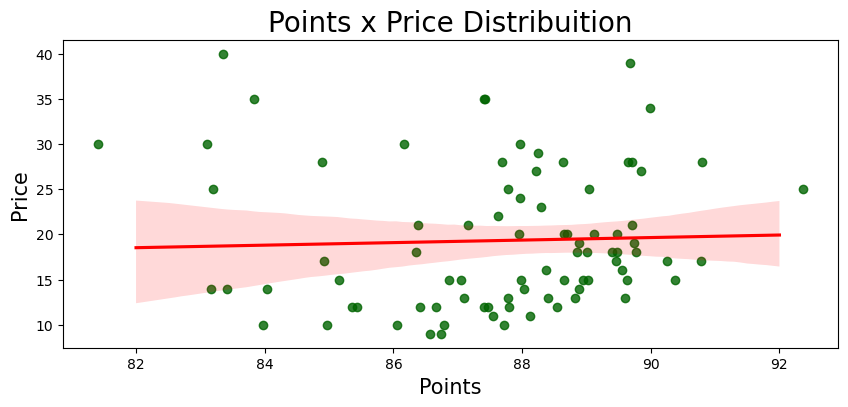

Slope of: Uruguay 1.0 2.5078420767982683


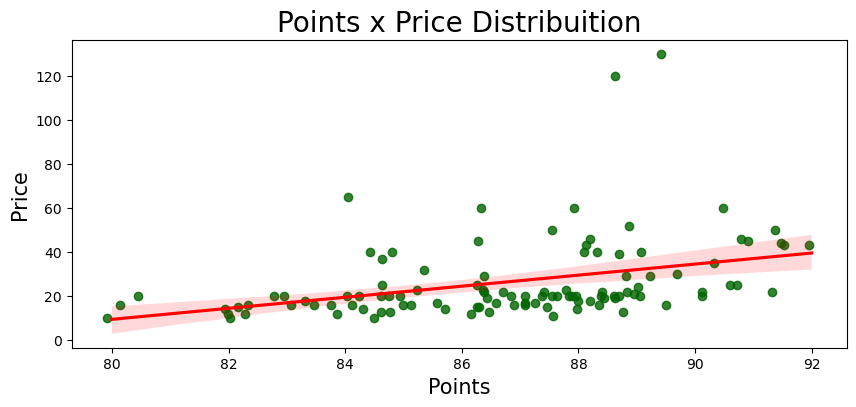

Slope of: United Kingdom 1.0 2.2705301784132623


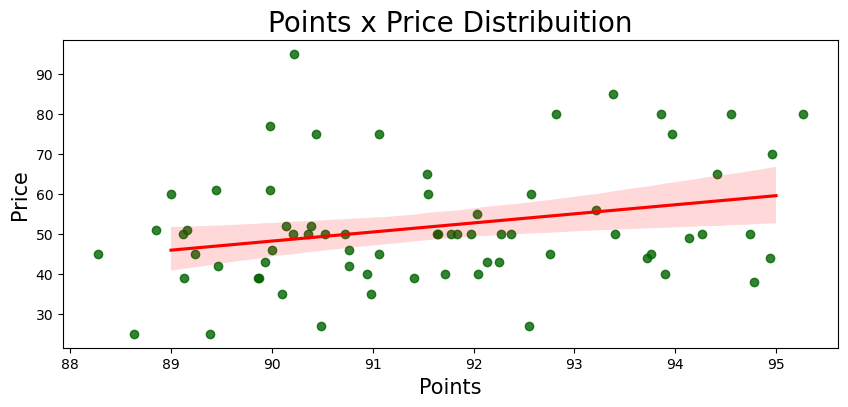

Slope of: Lebanon 1.0 2.0358846487424045


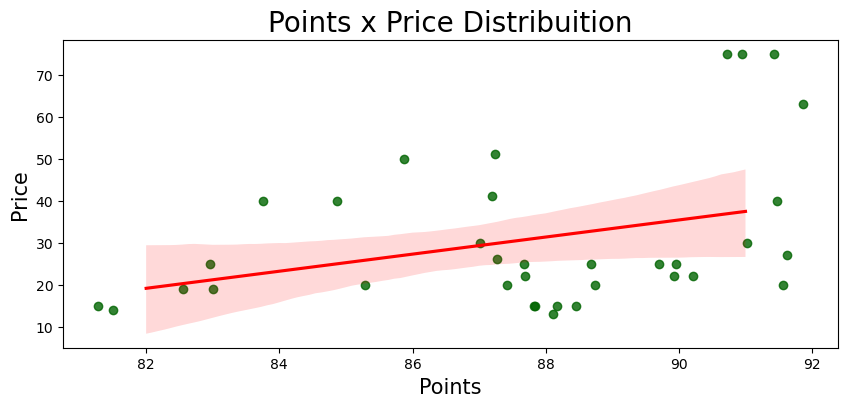

Slope of: Serbia 0.9999999999999992 5.210526315789487


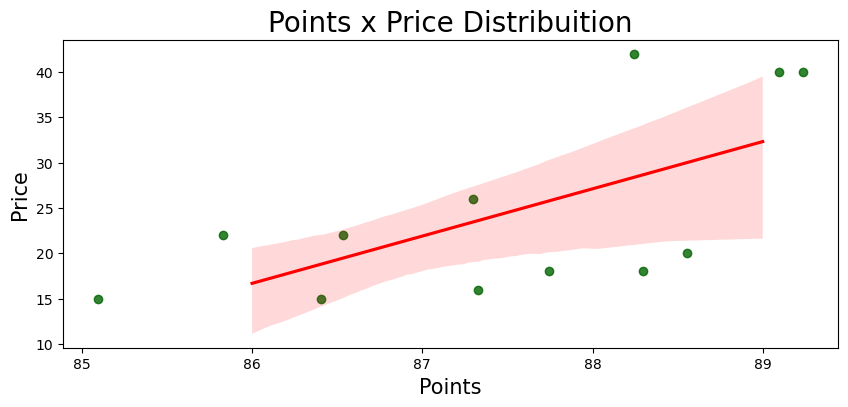

Slope of: Brazil 0.9999999999999998 1.2990460070780074


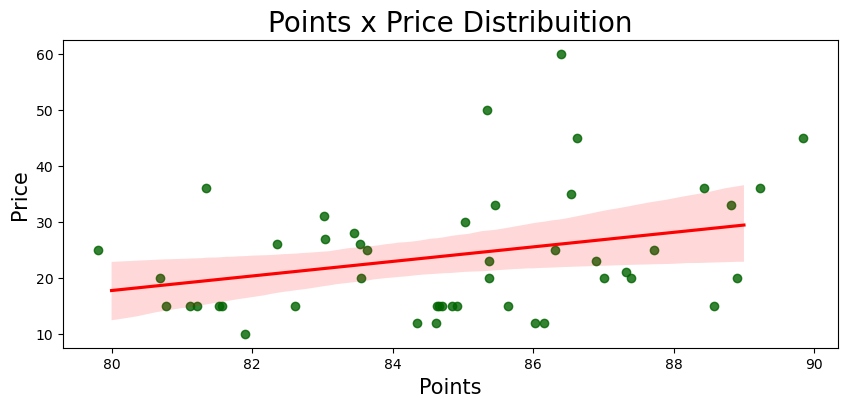

Slope of: Moldova 1.0 2.256014774882701


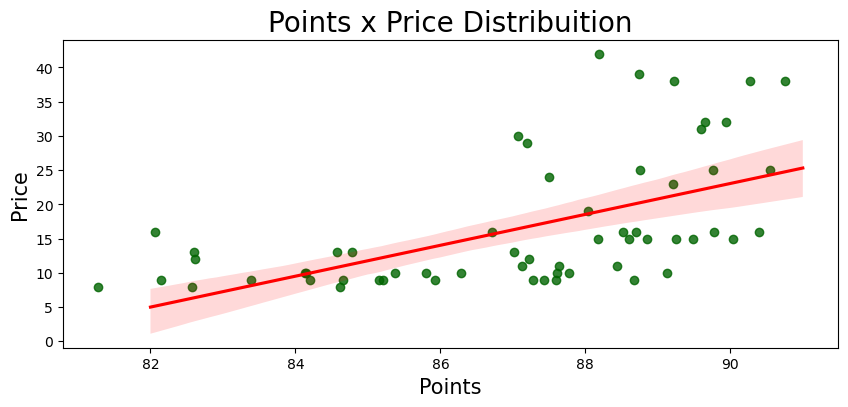

Slope of: Morocco 0.9999999999999998 0.05204460966542681


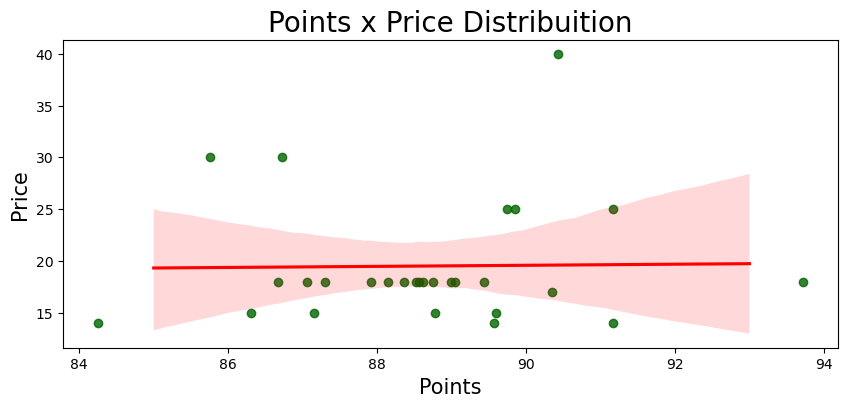

Slope of: Peru 1.0 2.395908543922962


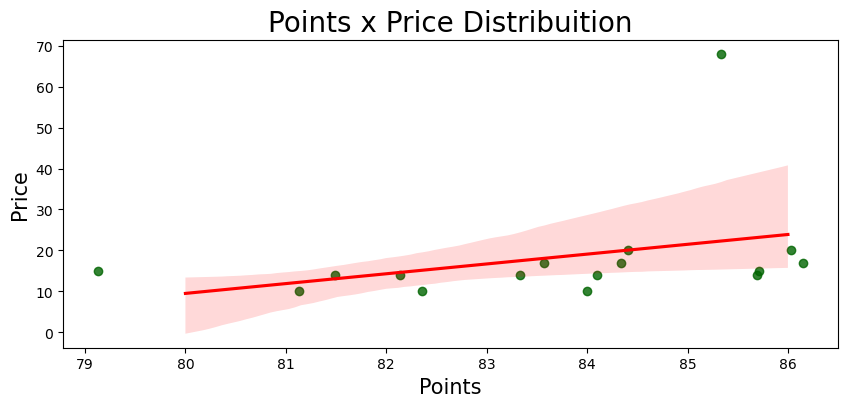

Slope of: India 0.9999999999999998 1.5000000000000002


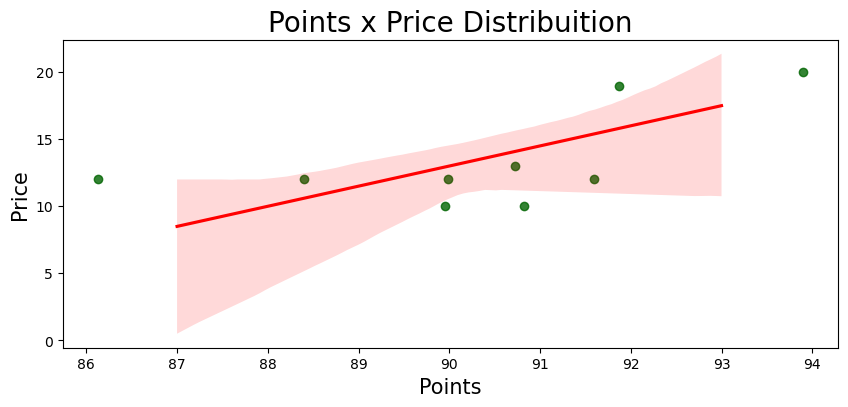

Slope of: Bulgaria 1.0 1.6541467192340165


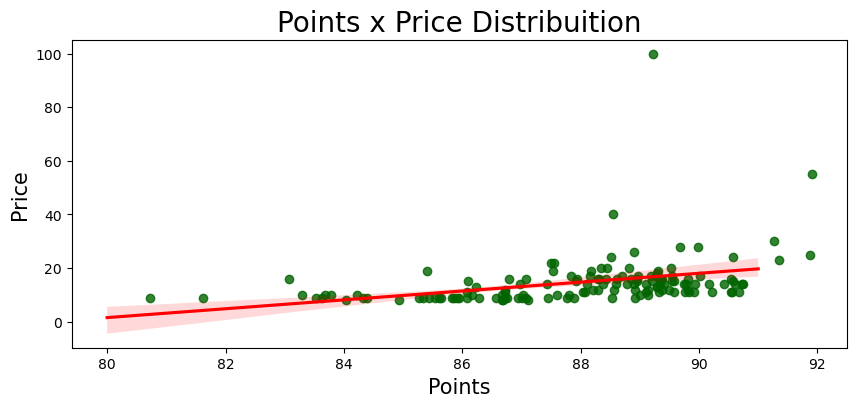

Slope of: Cyprus 1.0 0.5248226950354601


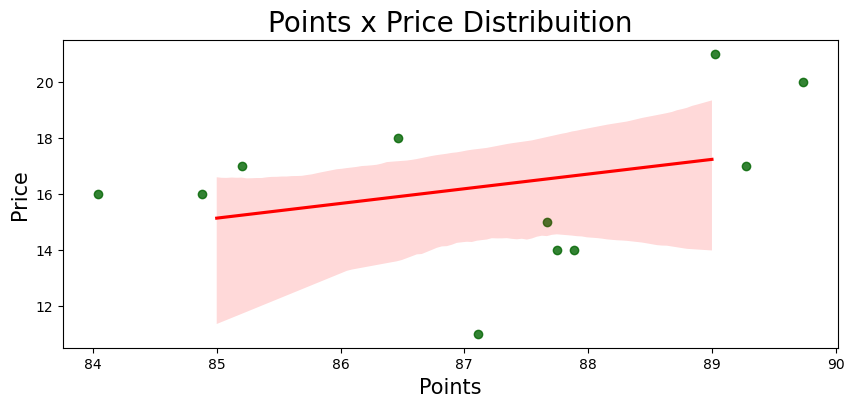

Slope of: Armenia 0.9999999999999999 0.9999999999999976


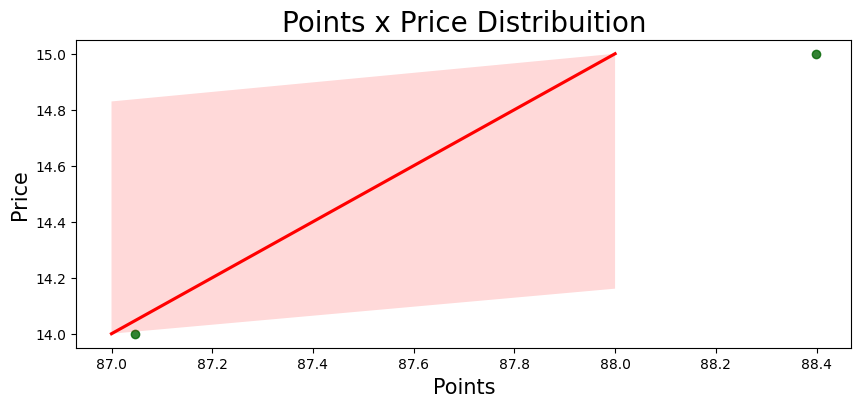

Slope of: Switzerland 0.9999999999999997 2.8333333333333264


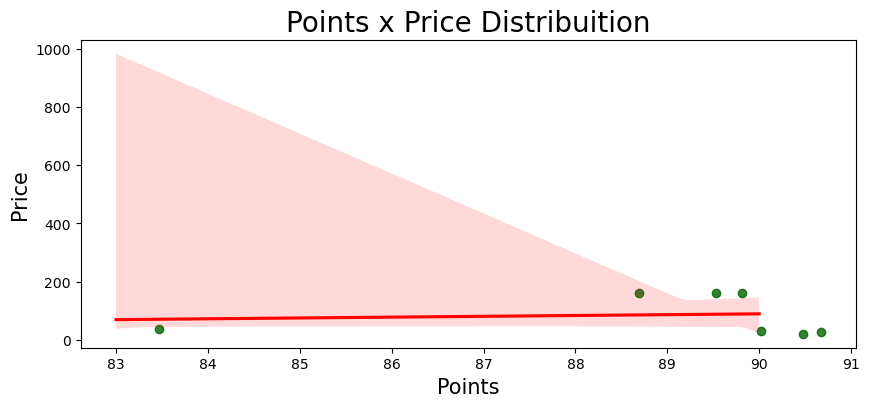

Slope of: Bosnia and Herzegovina -1.0 -0.3333333333333341


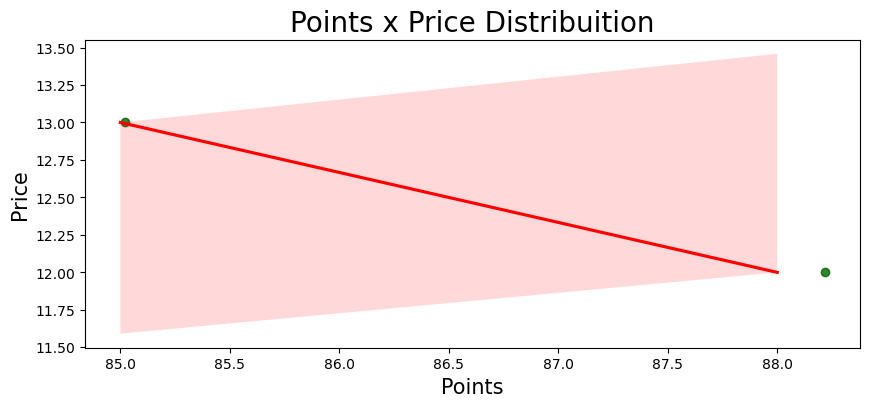

Slope of: Ukraine -1.0 -0.31019522776572667


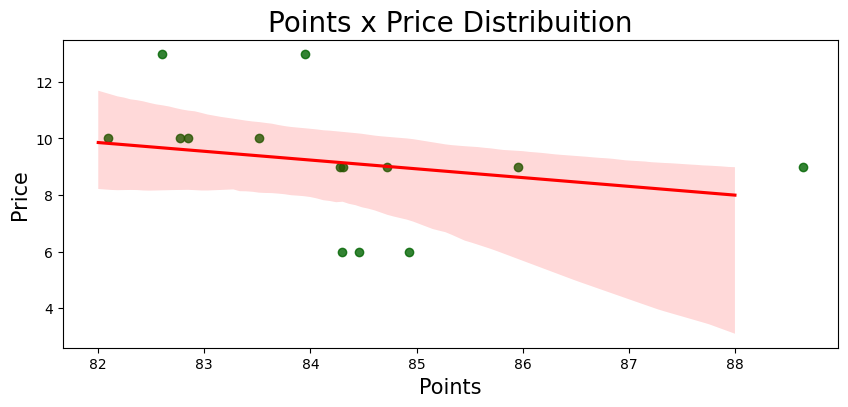

Slovakia has just one bottle of wine in this dataset


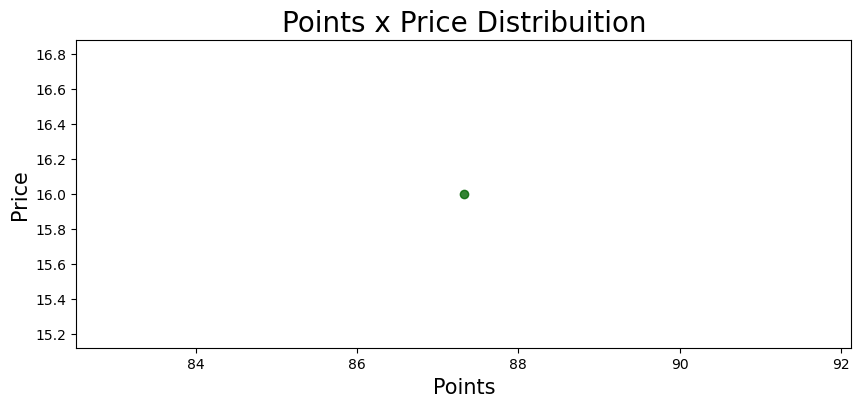

Slope of: North Macedonia 0.9999999999999998 0.21287128712871217


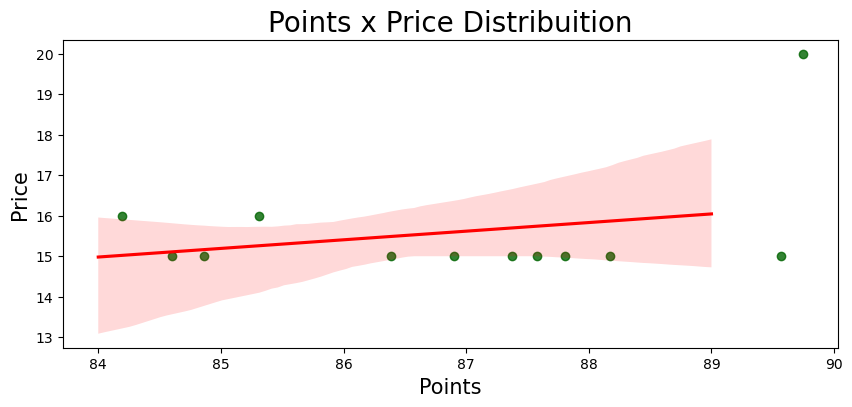

China has just one bottle of wine in this dataset


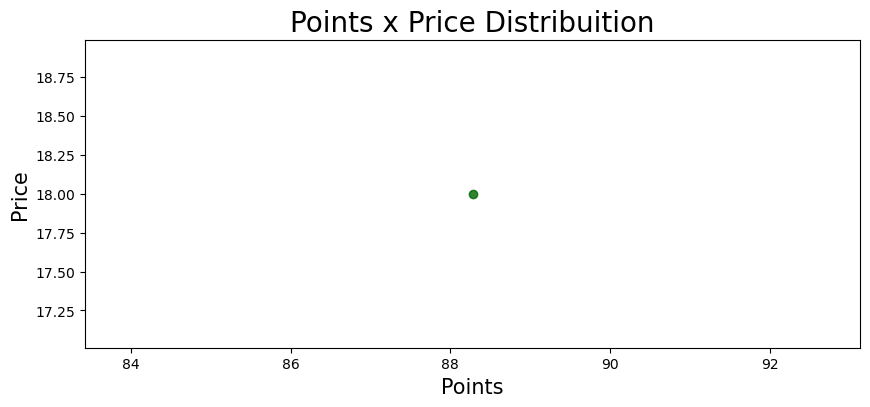

Egypt has just one bottle of wine in this dataset


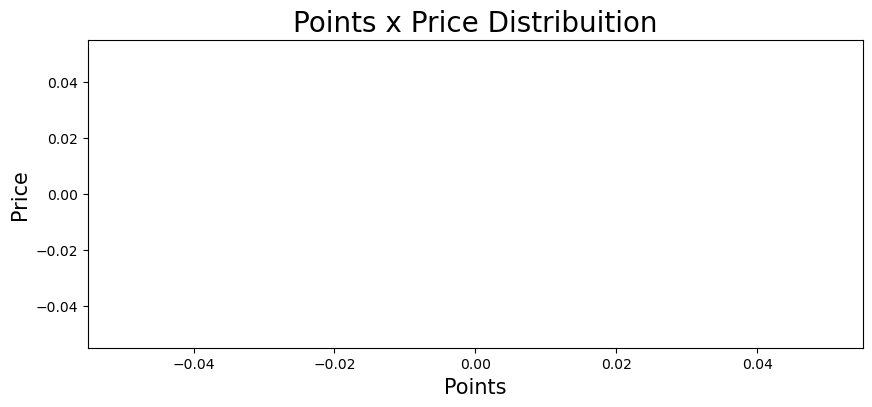

{'Italy': 7.552085911281582, 'Portugal': 6.008455338817511, 'United States of America': 3.9377851256089182, 'Spain': 5.3175928587393635, 'France': 9.93630064143265, 'Germany': 11.515506613985087, 'Argentina': 4.181243723246053, 'Chile': 3.900409444173919, 'Australia': 7.630469501226528, 'Austria': 4.343500873099224, 'South Africa': 5.273047187341252, 'New Zealand': 3.3981703177595075, 'Israel': 2.6346818513149426, 'Hungary': 8.930421533773497, 'Greece': 0.742795743621217, 'Romania': 1.7799315849486814, 'Mexico': 3.0757626550452546, 'Canada': 2.613864661980376, 'Turkey': 1.6612490401842834, 'Czechia': 3.8837209302325912, 'Slovenia': 3.578614472832327, 'Luxembourg': -2.2000000000000837, 'Croatia': 2.0280774233034875, 'Georgia': 0.14030834868611955, 'Uruguay': 2.5078420767982683, 'United Kingdom': 2.2705301784132623, 'Lebanon': 2.0358846487424045, 'Serbia': 5.210526315789487, 'Brazil': 1.2990460070780074, 'Moldova': 2.256014774882701, 'Morocco': 0.05204460966542681, 'Peru': 2.395908543922

In [17]:
#Creating a list of every country in the dataset
Countries = []
for land in df_wine1['country'].unique():
    Countries.append(land)
cleanlist = []
for country in Countries:
    if type(country) == type("x"):
        cleanlist.append(country)
print(cleanlist)


Slope = {}

for Country in cleanlist:
    filt = df_wine1["country"] == Country

    plt.figure(figsize=(10,4))

    g = sns.regplot(x='points', y='price', data=df_wine1[filt], line_kws={'color':'red'},
                        x_jitter=True, fit_reg=True, color='darkgreen')
    g.set_title("Points x Price Distribuition", fontsize=20)
    g.set_xlabel("Points", fontsize= 15)
    g.set_ylabel("Price", fontsize= 15)

    try:
        slope, intercept, r, p, sterr = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
        print( "Slope of:", Country , r, slope)

        Slope[Country] = Slope.get(Country, slope)
    except:
        print(Country, "has just one bottle of wine in this dataset")
    plt.show()

print(Slope)

creating a new dataframe

/var/folders/d0/ypf_6_yx65s8wv8rbpl0q1zh0000gn/T/ipykernel_30433/323487024.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


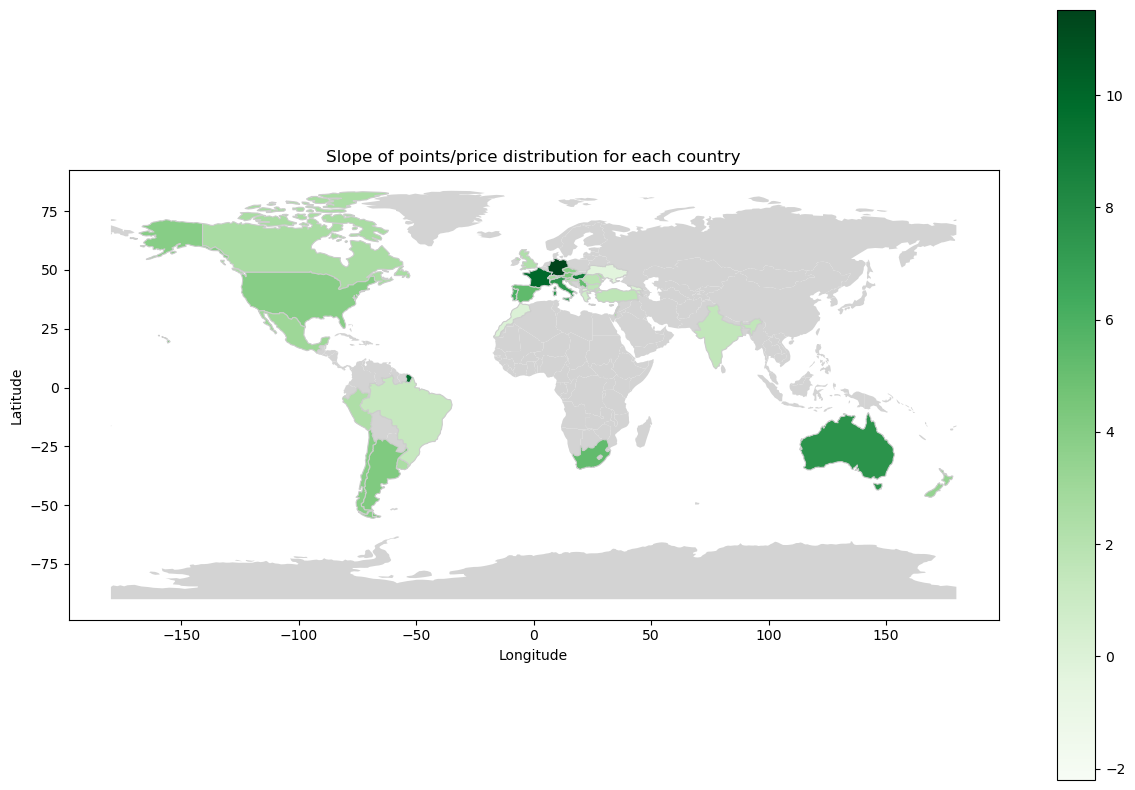

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.set_index('name').join(pd.DataFrame(Slope.items(), columns=['name', 'value']).set_index('name'))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
merged.plot(column='value', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Slope of points/price distribution for each country')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

/var/folders/d0/ypf_6_yx65s8wv8rbpl0q1zh0000gn/T/ipykernel_30433/3776190233.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


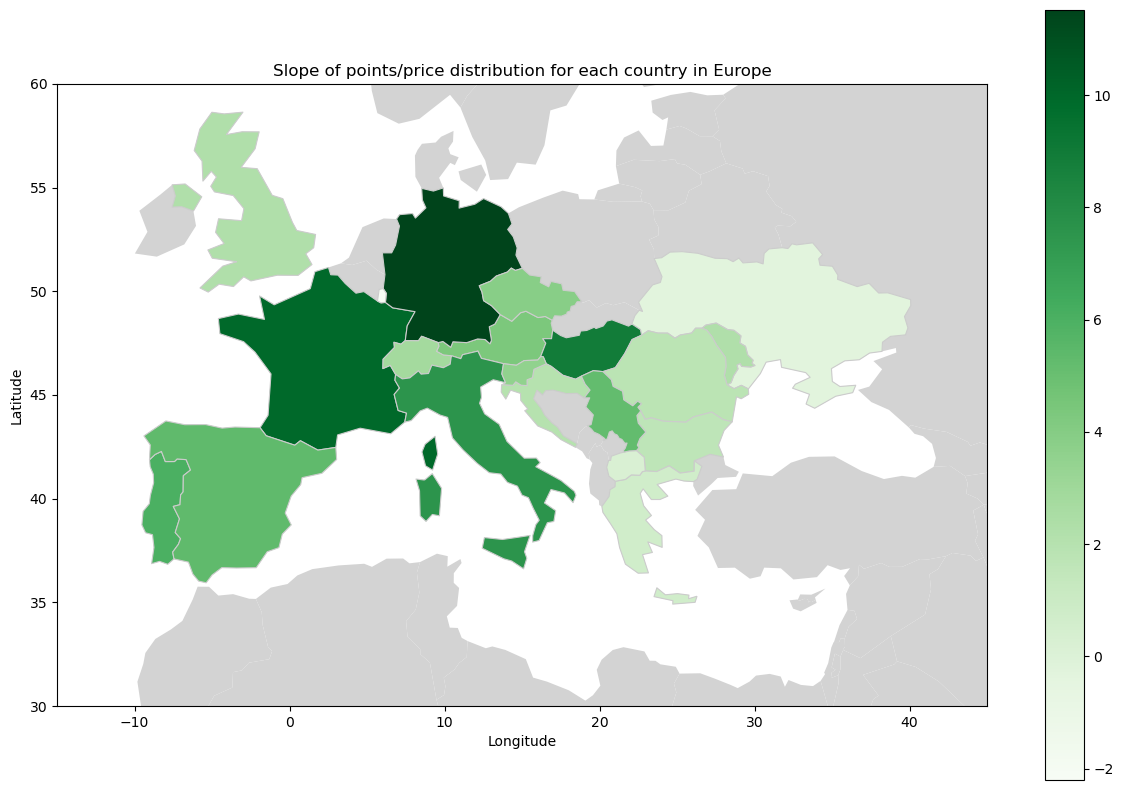

In [19]:
# Lade die Weltkarte
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtere nur die Länder in Europa
europe = world[world['continent'] == 'Europe']

# Füge eine Spalte mit Hangwerten hinzu
merged = europe.set_index('name').join(pd.DataFrame(Slope.items(), columns=['name', 'value']).set_index('name'))

# Plot für Europa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
merged.plot(column='value', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Slope of points/price distribution for each country in Europe')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

lat_min, lat_max = 30, 60
lon_min, lon_max = -15, 45

# Set the limits for the x-axis (longitude) and y-axis (latitude)
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
plt.show()

auf jedes land den durchschnittspreis schreiben
lowest slope doesnt mean that the price is cheap (like in switzerland)

"In der schweiz bekommt man für weniger geld einen qualitativ besseren wein als in deutschland. Jedoch kostet in der Schweiz im Allgemeinen der Wein mehr"

The slope of price/points distribution can´t stand for itself because there counld be a confusion that in countries like switzerland you can buy wine of quality for much less money than in germany. So we have to add the mean price on top of each country to show more transparency

In [33]:
mean_price = df_wine1.groupby('country')['price'].mean().round(1).reset_index()
dict_meanprice = mean_price.set_index('country').to_dict()['price']
dict_meanprice

{'Argentina': 24.5,
 'Armenia': 14.5,
 'Australia': 35.4,
 'Austria': 30.8,
 'Bosnia and Herzegovina': 12.5,
 'Brazil': 23.8,
 'Bulgaria': 14.6,
 'Canada': 35.7,
 'Chile': 20.8,
 'China': 18.0,
 'Croatia': 25.5,
 'Cyprus': 16.3,
 'Czechia': 24.2,
 'Egypt': nan,
 'France': 41.1,
 'Georgia': 19.3,
 'Germany': 42.3,
 'Greece': 22.4,
 'Hungary': 40.6,
 'India': 13.3,
 'Israel': 31.8,
 'Italy': 39.7,
 'Lebanon': 30.7,
 'Luxembourg': 23.3,
 'Mexico': 26.8,
 'Moldova': 16.7,
 'Morocco': 19.5,
 'New Zealand': 26.9,
 'North Macedonia': 15.6,
 'Peru': 18.1,
 'Portugal': 26.2,
 'Romania': 15.2,
 'Serbia': 24.5,
 'Slovakia': 16.0,
 'Slovenia': 24.8,
 'South Africa': 24.7,
 'Spain': 28.2,
 'Switzerland': 85.3,
 'Turkey': 24.6,
 'Ukraine': 9.2,
 'United Kingdom': 51.7,
 'United States of America': 36.6,
 'Uruguay': 26.4}

/var/folders/d0/ypf_6_yx65s8wv8rbpl0q1zh0000gn/T/ipykernel_30433/418252446.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/d0/ypf_6_yx65s8wv8rbpl0q1zh0000gn/T/ipykernel_30433/418252446.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['new_value']):


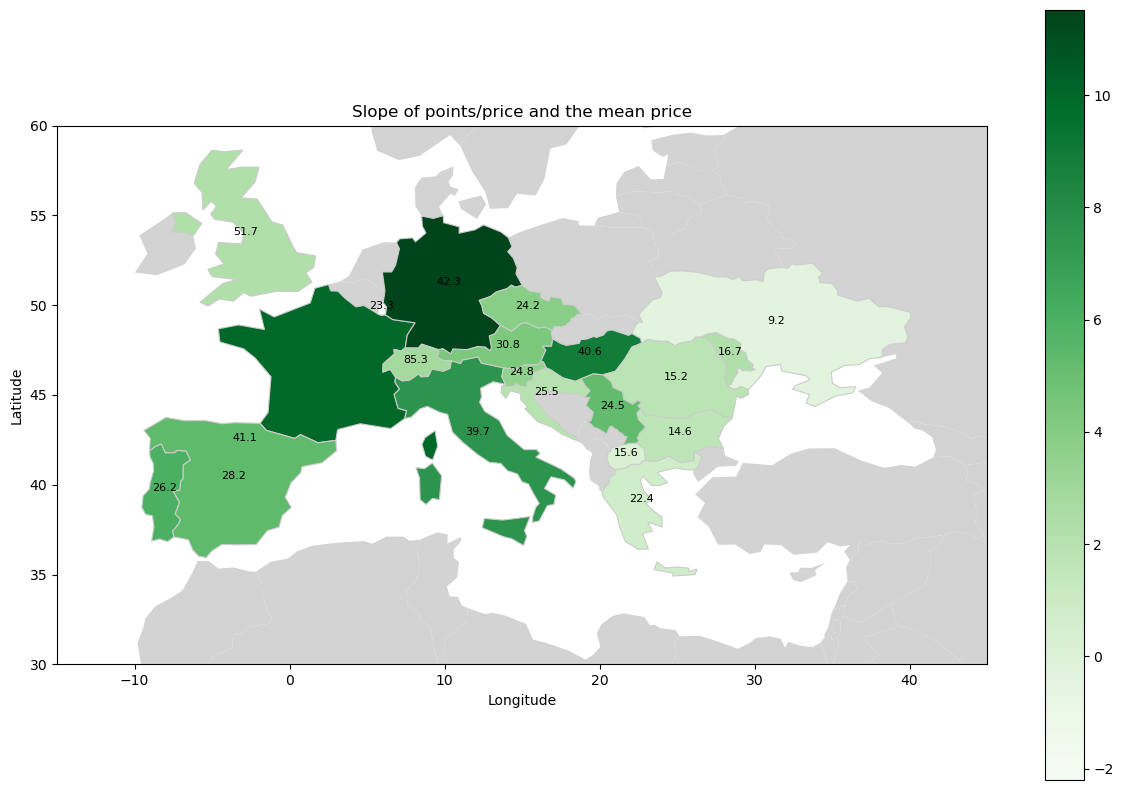

In [36]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtere nur die Länder in Europa
europe = world[world['continent'] == 'Europe']

# Füge eine Spalte mit den ursprünglichen Hangwerten hinzu
merged = europe.set_index('name').join(pd.DataFrame(Slope.items(), columns=['name', 'value']).set_index('name'))

# Füge eine weitere Spalte mit den neuen Hangwerten hinzu
merged['new_value'] = pd.Series(dict_meanprice)
merged = merged.dropna(subset=['value'])

# Plot für Europa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
merged.plot(column='value', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Slope of points/price and the mean price')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['new_value']):
    ax.text(x, y, str(label), fontsize=8, ha='center')

lat_min, lat_max = 30, 60
lon_min, lon_max = -15, 45

# Set the limits for the x-axis (longitude) and y-axis (latitude)
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
plt.show()